<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre3/CTR1_Exercice3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 3.8

## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur

## Définir les constantes du problème

In [0]:
k = 10 # L2/mol2/s
Vdot = 4 # mol/s

R = 0.082057338 # L*atm/K/mol
P = 16.4 # atm
T = 500 # K

CT = P/R/T

xA0 = 0.5 # -
xB0 = 0.5 # -
xC0 = 0 # -


CA0 = xA0 * CT # mol/L
CB0 = xB0 * CT  # mol/L
CC0 = xC0 * CT  # mol/L

FA0 = Vdot * CA0 # mol/s
FB0 = Vdot * CB0 # mol/s
FC0 = Vdot * CC0 # mol/s

## Définir les équations à résoudre

In [0]:
def equations(variables, V, CT, k):
    FA, FB, FC = variables
    
    xA = FA / (FA+FB+FC)
    xB = FB / (FA+FB+FC)
    
    CA = xA * CT
    CB = xB * CT
    
    r = k * CA**2 * CB
    
    RA = -2 * r
    RB = -r
    RC = r
    
    dFA = RA
    dFB = RB
    dFC = RC
    
    return dFA, dFB, dFC
    

## Définir les conditions initiales et bornes d'intégration

In [0]:
conditions_initiales = [FA0, FB0, FC0]

V = np.arange(0, 250.001, 0.001)

## Résoudre le problème à l'aide du solveur

In [0]:
resultats = solveur.odeint(
    equations,
    conditions_initiales,
    V,
    (CT, k)
)

In [0]:
FA = resultats[:,0] 
FB = resultats[:,1]
FC = resultats[:,2] 

X = 1 - FA / FA0

xA = FA / (FA+FB+FC)
xB = FB / (FA+FB+FC)
xC = FC / (FA+FB+FC)

CA = xA * CT 
CB = xB * CT
CC = xC * CT

## Visualiser les résultats

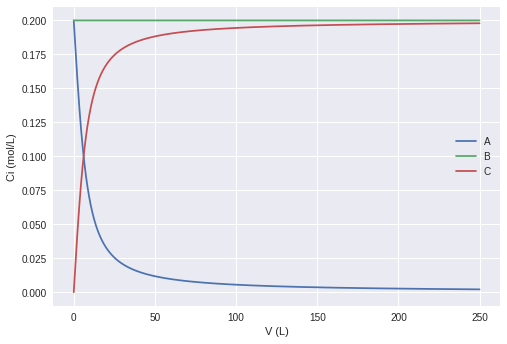

In [7]:
plt.figure(1)
plt.plot(V, CA, V, CB, V, CC)
plt.xlabel('V (L)')
plt.ylabel('Ci (mol/L)')
plt.legend(['A', 'B', 'C'])
plt.show()

In [8]:
X[V==250]

array([0.99471571])

In [0]:
V_X_099 = V[X>0.99][0]

In [0]:
V_X_08 = V[X>0.8][0]

In [11]:
tau_X_099 = V_X_099 / Vdot
tau_X_099

34.173

In [12]:
tau_X_08 = V_X_08 / Vdot
tau_X_08

2.5095